> Dataset: https://www.kaggle.com/datasets/uraninjo/augmented-alzheimer-mri-dataset

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import random
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


# Set seeds for reproducibility
SEED = 49 
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# Define target size for resizing images
IMG_HEIGHT, IMG_WIDTH = 128, 128
data = Path("./Data/AugmentedAlzheimerDataset")
dirs = list(data.glob("*"))

# Print number of images per class
for dir_path in dirs:
    class_imgs = list(dir_path.rglob("*.jpg"))  
    print(f"{dir_path.name}: {len(class_imgs)} images")


MildDemented: 8960 images
ModerateDemented: 6464 images
NonDemented: 9600 images
VeryMildDemented: 8960 images


In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


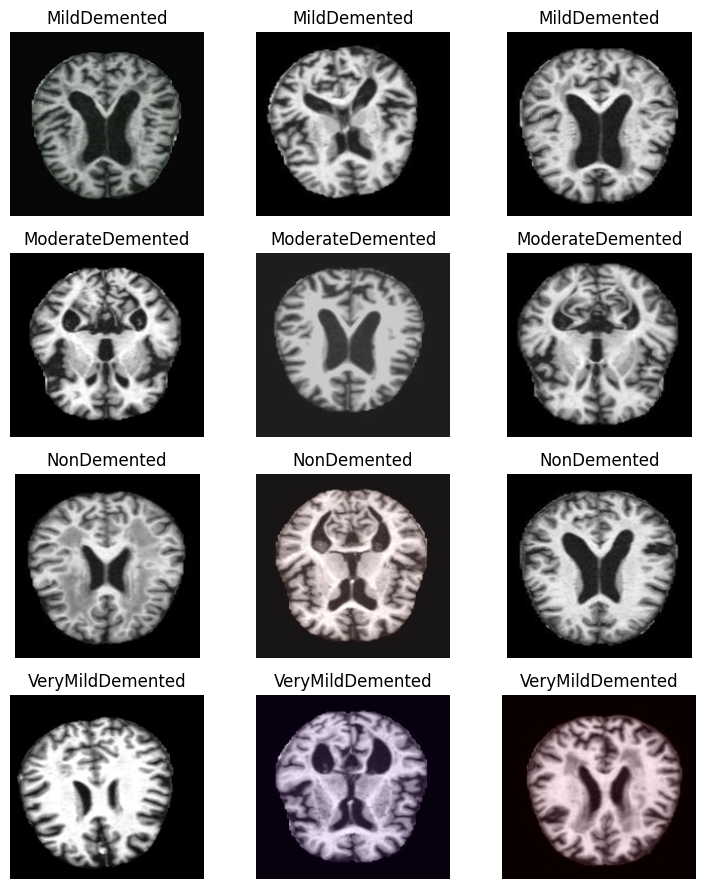

In [4]:
fig, axs = plt.subplots(4, 3, figsize=(9, 11))

for i in range(4):
    class_imgs = list(dirs[i].glob("*.jpg"))  
    for j in range(3):
        img = cv2.imread(str(class_imgs[j]))
        axs[i, j].imshow(img, cmap='gray')
        axs[i, j].axis("off")
        axs[i, j].set_title(dirs[i].name)
plt.show()


In [5]:
processed_images = {}

for dir_path in dirs:
    class_imgs = list(dir_path.rglob("*.jpg"))  
    processed_images[dir_path.name] = [] 

    for img_path in class_imgs:
        img = cv2.imread(str(img_path))
        
        if img is not None:
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img_resized = cv2.resize(img_gray, (IMG_WIDTH, IMG_HEIGHT))
            img_normalized = img_resized / 255.0
            processed_images[dir_path.name].append(img_normalized)

print("Images have been converted to grayscale and resized.")


Images have been converted to grayscale and resized.


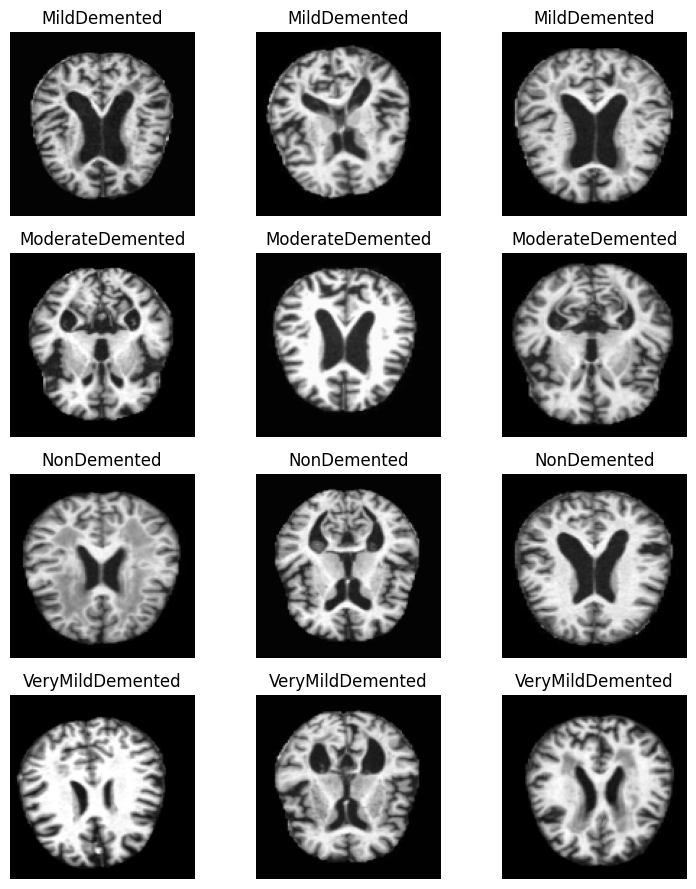

In [6]:
fig, axs = plt.subplots(4, 3, figsize=(9, 11))

for i, (label, images) in enumerate(processed_images.items()):
    for j in range(3):
        axs[i, j].imshow(images[j], cmap='gray')
        axs[i, j].axis("off")
        axs[i, j].set_title(label)
plt.show()


- Training set: 60% of the data.
- Validation set: 20% of the data.
- Test set: 20% of the data.

In [7]:
images = []
labels = []

for class_name, img_list in processed_images.items():
    for img in img_list:
        images.append(img)
        labels.append(class_name)

# Convert to numpy arrays
images = np.array(images).reshape(-1, IMG_HEIGHT, IMG_WIDTH, 1)  # Add channel dimension for grayscale images
labels = np.array(labels)

print("Image data and labels prepared.")


Image data and labels prepared.


In [8]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)  # Encode labels as integers

print("Labels encoded.")


Labels encoded.


In [9]:
# Split data into training (60%) and remaining (40% for validation + test)
train_images, temp_images, train_labels, temp_labels = train_test_split(
    images, labels, test_size=0.4, random_state=42, stratify=labels
)

# Split the remaining 40% into validation (20%) and test (20%) sets
val_images, test_images, val_labels, test_labels = train_test_split(
    temp_images, temp_labels, test_size=0.5, random_state=42, stratify=temp_labels
)

print(f"Training set: {len(train_images)} images")
print(f"Validation set: {len(val_images)} images")
print(f"Test set: {len(test_images)} images")


Training set: 20390 images
Validation set: 6797 images
Test set: 6797 images


In [10]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam  



model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)),
    #BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    #BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    #BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    #BatchNormalization(),
    MaxPooling2D((2, 2)),
    

    Flatten(),
    
    Dense(128, activation='relu'),
    Dropout(0.7),

    
    Dense(4, activation='softmax')  # Use 4 units for 4 classes with 'softmax' activation
])

model.compile(optimizer='adam',    #Adam(learning_rate=)
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Model compiled for 4-class prediction.")


Model compiled for 4-class prediction.


In [11]:
# # Train the model
# epochs = 8
# history = model.fit(train_images, train_labels, epochs=epochs, batch_size=32, validation_data=(val_images, val_labels))
# # Evaluate the model on the test data
# test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)

In [12]:
# # Extract final training and validation metrics
# train_loss = history.history['loss'][-1]
# train_accuracy = history.history['accuracy'][-1]
# val_loss = history.history['val_loss'][-1]
# val_accuracy = history.history['val_accuracy'][-1]

# # Print all metrics
# print(f"Final Training Loss: {train_loss:.4f} | Final Training Accuracy: {train_accuracy:.4f} | ")
# print(f"Final Validation Loss: {val_loss:.4f} | Final Validation Accuracy: {val_accuracy:.4f}")
# print(f"Test Loss: {test_loss:.4f} | Test Accuracy: {test_accuracy:.4f}")
# print(f"Final Train Accuracy: {train_accuracy:.4f}  | Final Validation Accuracy: {val_accuracy:.4f} | Test Accuracy: {test_accuracy:.4f} ")


In [13]:
# import matplotlib.pyplot as plt

# # Assuming `history` has the training history data from model.fit()

# # Plot training and validation accuracy
# plt.figure(figsize=(12, 5))
# plt.subplot(1, 2, 1)
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Model Accuracy with 0.7 Dropout (16,32,64,128)')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend(loc='upper left')

# # Plot training and validation loss
# plt.subplot(1, 2, 2)
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Loss with 0.7 Dropout (16,32,64,128)')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend(loc='upper left')

# plt.tight_layout()
# plt.show()

In [14]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
# import matplotlib.pyplot as plt
# import numpy as np

# # Define your actual class names here
# class_names = ['Non Demented', 'Very Mild Demented', 'Mild Demented', 'Moderate Demented']

# # Evaluate the model on test data
# test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
# print(f"Test Loss: {test_loss} | Test Accuracy: {test_accuracy}")

# # Get predictions
# y_pred = model.predict(test_images)
# y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# # Compute and display confusion matrix with updated labels
# cm = confusion_matrix(test_labels, y_pred_classes)
# plt.figure(figsize=(8, 6))  # Increase the figure size for clarity
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
# disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
# plt.xlabel("Predicted Label", fontsize=12)
# plt.ylabel("True Label", fontsize=12)
# plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
# plt.title("Confusion Matrix")
# plt.show()

# # Print classification report with class names
# report = classification_report(test_labels, y_pred_classes, target_names=class_names)
# print("Classification Report:\n", report)


( everything with x is either Overfit or Underfit )

****
**Dropout(0.7)**
- (16) Final Train Accuracy: 0.2825  | Final Validation Accuracy: 0.2825 | Test Accuracy: 0.2825  x
- (16, 32) Final Train Accuracy: 0.9116  | Final Validation Accuracy: 0.8748 | Test Accuracy: 0.8713 x 
- (16,32,64) Final Train Accuracy: 0.9046  | Final Validation Accuracy: 0.8955 | Test Accuracy: 0.8933  ok 
- (16,32,64,128) Final Train Accuracy: 0.9188  | Final Validation Accuracy: 0.9036 | Test Accuracy: 0.9067 best overall 
- Final Train Accuracy: 0.9753  | Final Validation Accuracy: 0.9219 | Test Accuracy: 0.9301 x
- (16,32,64,128,256)

**Dropout (0.6)**
- (16)  Final Train Accuracy: 0.7658  | Final Validation Accuracy: 0.8031 | Test Accuracy: 0.8026 x
- (16, 32) Final Train Accuracy: 0.9116  | Final Validation Accuracy: 0.8748 | Test Accuracy: 0.8713 x
- (16,32,64) Final Train Accuracy: 0.9067  | Final Validation Accuracy: 0.8847 | Test Accuracy: 0.8886 best 
- (16,32,64,128) Final Train Accuracy: 0.9389  | Final Validation Accuracy: 0.9048 | Test Accuracy: 0.8966 x 
- (16,32,64,128,256) Final Train Accuracy: 0.9844  | Final Validation Accuracy: 0.8961 | Test Accuracy: 0.8980 x

**Dropout(0.5)**
- (16) Final Train Accuracy: 0.8843  | Final Validation Accuracy: 0.8376 | Test Accuracy: 0.8424  x
- (16, 32) Final Train Accuracy: 0.9428  | Final Validation Accuracy: 0.8752 | Test Accuracy: 0.8738 x
- (16,32,64) Final Train Accuracy: 0.9537  | Final Validation Accuracy: 0.9067 | Test Accuracy: 0.8985 x
- (16,32,64,128) Final Train Accuracy: 0.9577  | Final Validation Accuracy: 0.9126 | Test Accuracy: 0.9088 best 
- (16,32,64,128,256) Final Train Accuracy: 0.9827  | Final Validation Accuracy: 0.9088 | Test Accuracy: 0.9028 x

**Dropout(0.4)**
- (16) Final Train Accuracy: 0.9085  | Final Validation Accuracy: 0.8307 | Test Accuracy: 0.8424 x
- (16,32) Final Train Accuracy: 0.9644  | Final Validation Accuracy: 0.8757 | Test Accuracy: 0.8747 x 
- (16,32,64) Final Train Accuracy: 0.9537  | Final Validation Accuracy: 0.9067 | Test Accuracy: 0.8985 x 
- (16,32,64,128) Final Train Accuracy: 0.9640  | Final Validation Accuracy: 0.9111 | Test Accuracy: 0.9129 best 
- (16,32,64,128,256) Final Train Accuracy: 0.9892  | Final Validation Accuracy: 0.9225 | Test Accuracy: 0.9185 x


**Experimenting with learning rate**
- 0.001   Final Train Accuracy: 0.9507  | Final Validation Accuracy: 0.9175 | Test Accuracy: 0.9183  x
- 0.0005  Final Train Accuracy: 0.9331  | Final Validation Accuracy: 0.9088 | Test Accuracy: 0.9114  x
- 0.0001  Final Train Accuracy: 0.7579  | Final Validation Accuracy: 0.8049 | Test Accuracy: 0.8021  no over/under ok
- default Final Train Accuracy: 0.9188  | Final Validation Accuracy: 0.9036 | Test Accuracy: 0.9067 best x


**Experimenting with Best Model by adding Dense layer**  
- (64)(0.7)   Final Train Accuracy: 0.8320  | Final Validation Accuracy: 0.8639 | Test Accuracy: 0.8574 x
- (128)(0.7)  Final Train Accuracy: 0.9188  | Final Validation Accuracy: 0.9036 | Test Accuracy: 0.9067 best performing 
- (256)(0.7)  Final Train Accuracy: 0.9612  | Final Validation Accuracy: 0.9163 | Test Accuracy: 0.9133 x

- (128(0.7),64(0.2)) Final Train Accuracy:  0.9496  | Final Validation Accuracy: 0.8813 | Test Accuracy: 0.8829 x
- (128(0.5),64(0.5)) Final Train Accuracy:  0.9097  | Final Validation Accuracy: 0.8895 | Test Accuracy: 0.8958 x
- (128(0.4),64(0.3)) Final Train Accuracy:  0.9586  | Final Validation Accuracy: 0.9082 | Test Accuracy: 0.9088 x
- (128(0.5),64(0.2)) Final Train Accuracy:  0.9492  | Final Validation Accuracy: 0.9029 | Test Accuracy: 0.8958  x
- (128(0.5),128(0.5)) Final Train Accuracy: 0.9479  | Final Validation Accuracy: 0.9078 | Test Accuracy: 0.9055 x


**Experimenting with Best Model By Adding Batch Normaliztion**
- Conv_Layer (16,32,64,128) and One Dense Layer(128) one Dropout (0.7) Final Train Accuracy: 0.8708  | Final Validation Accuracy: 0.8682 | Test Accuracy: 0.8691 


**Experimenting with Best Model By Changing Activation Function**
- LeakyreLU Final Train Accuracy: 0.9854  | Final Validation Accuracy: 0.9257 | Test Accuracy: 0.9291  x
- tanh      Final Train Accuracy: 0.9824  | Final Validation Accuracy: 0.8930 | Test Accuracy: 0.8910  x
- relu      Final Train Accuracy: 0.9188  | Final Validation Accuracy: 0.9036 | Test Accuracy: 0.9067 best 
- (mixed functions) tanh conv layers and relu dense Final Train Accuracy: 0.9680  | Final Validation Accuracy: 0.9058 | Test Accuracy: 0.9010  x


**Experimiting with Diffrent Optimizer**
- Adam     Final Train Accuracy: 0.9188  | Final Validation Accuracy: 0.9036 | Test Accuracy: 0.9067 best 
- SGD      Final Train Accuracy: 0.7667  | Final Validation Accuracy: 0.7530 | Test Accuracy: 0.7487  x
- RMSprop  Final Train Accuracy: 0.8941  | Final Validation Accuracy: 0.8847 | Test Accuracy: 0.8913  x


**Final**
- 20 epoches convlayer (16,32,64,128) dense(128) Dropout (0.7) Final Train Accuracy: 0.9188  | Final Validation Accuracy: 0.9036 | Test Accuracy: 0.9067 best overall 
- 8 epoch (16,32,64,128) dense(128) Dropout(0.7) Final Train Accuracy: 0.8290  | Final Validation Accuracy: 0.8388 | Test Accuracy: 0.8327 with smooth learning curves 





# MLP 


In [15]:
# Flatten the images
train_images_flat = train_images.reshape(train_images.shape[0], -1)
val_images_flat = val_images.reshape(val_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

print("Images have been flattened")


Images have been flattened


In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam,SGD

# Define the MLP model
model = Sequential([
    Dense(512, activation='relu', input_shape=(128 * 128,)),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Summary of the model
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               8389120   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 8,521,476
Trainable params: 8,521,476
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Train the model
history = model.fit(train_images_flat, train_labels, 
                    epochs=30, 
                    batch_size=32, 
                    validation_data=(val_images_flat, val_labels))


Epoch 1/30
638/638 [==============================] - 4s 5ms/step - loss: 1.5333 - accuracy: 0.2697 - val_loss: 1.3758 - val_accuracy: 0.2825
Epoch 2/30
638/638 [==============================] - 3s 4ms/step - loss: 1.3765 - accuracy: 0.2815 - val_loss: 1.3758 - val_accuracy: 0.2825
Epoch 3/30
638/638 [==============================] - 2s 4ms/step - loss: 1.3761 - accuracy: 0.2827 - val_loss: 1.3759 - val_accuracy: 0.2825
Epoch 4/30
638/638 [==============================] - 2s 4ms/step - loss: 1.3763 - accuracy: 0.2811 - val_loss: 1.3759 - val_accuracy: 0.2825
Epoch 5/30
638/638 [==============================] - 2s 4ms/step - loss: 1.3763 - accuracy: 0.2823 - val_loss: 1.3758 - val_accuracy: 0.2825
Epoch 6/30
638/638 [==============================] - 2s 4ms/step - loss: 1.3762 - accuracy: 0.2823 - val_loss: 1.3758 - val_accuracy: 0.2825
Epoch 7/30
638/638 [==============================] - 2s 4ms/step - loss: 1.3762 - accuracy: 0.2810 - val_loss: 1.3758 - val_accuracy: 0.2825
Epoch 

In [22]:
# Get the final training and validation metrics
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

test_loss, test_accuracy = model.evaluate(test_images_flat, test_labels, verbose=2)

# Print all metrics
print(f"Final Training Loss: {train_loss:.4f} | Final Training Accuracy: {train_accuracy:.4f} | ")
print(f"Final Validation Loss: {val_loss:.4f} | Final Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f} | Test Accuracy: {test_accuracy:.4f}")
print(f"Final Train Accuracy: {train_accuracy:.4f}  | Final Validation Accuracy: {val_accuracy:.4f} | Test Accuracy: {test_accuracy:.4f} ")



213/213 - 0s - loss: 1.3758 - accuracy: 0.2825 - 339ms/epoch - 2ms/step
Final Training Loss: 1.3758 | Final Training Accuracy: 0.2825 | 
Final Validation Loss: 1.3758 | Final Validation Accuracy: 0.2825
Test Loss: 1.3758 | Test Accuracy: 0.2825
Final Train Accuracy: 0.2825  | Final Validation Accuracy: 0.2825 | Test Accuracy: 0.2825 


**Dense Layers**

**1 Dense Layers** 
- (16) Final Train Accuracy: 0.5341  | Final Validation Accuracy: 0.5104 | Test Accuracy: 0.5232 x
- (32) Final Train Accuracy: 0.2825  | Final Validation Accuracy: 0.2825 | Test Accuracy: 0.2825 x
- (64) 

**2 Dense Layers**
- (32,16) Final Train Accuracy: 0.6829  | Final Validation Accuracy: 0.6540 | Test Accuracy: 0.6526 x
- (64,32) Final Train Accuracy: 0.7795  | Final Validation Accuracy: 0.7394 | Test Accuracy: 0.7474 x
- (128,64) Final Train Accuracy: 0.7795  | Final Validation Accuracy: 0.7196 | Test Accuracy: 0.7218 x
- (256,128) Final Train Accuracy: 0.7837  | Final Validation Accuracy: 0.7286 | Test Accuracy: 0.7372 x
- (512,256) Final Train Accuracy: 0.8074  | Final Validation Accuracy: 0.7605 | Test Accuracy: 0.7699 overall best perfroming   

**3 Dense Layers** 
- (64,32,16) Final Train Accuracy: 0.2825  | Final Validation Accuracy: 0.2825 | Test Accuracy: 0.2825 x
- (128,64,32) Final Train Accuracy: 0.7747  | Final Validation Accuracy: 0.7215 | Test Accuracy: 0.7318  best 
- (256,128,64) Final Train Accuracy: 0.8139  | Final Validation Accuracy: 0.6813 | Test Accuracy: 0.7085 x
- (512,256,128) Final Train Accuracy: 0.8074  | Final Validation Accuracy: 0.7605 | Test Accuracy: 0.2417  x

**4 Desne Layers** 
- (128,64,32,16) Final Train Accuracy: 0.2825  | Final Validation Accuracy: 0.2825 | Test Accuracy: 0.2825  x
- (256,128,64,32) Final Train Accuracy: 0.8047  | Final Validation Accuracy: 0.7492 | Test Accuracy: 0.7537 x
- (512,256,128,64) Final Train Accuracy: 0.8154  | Final Validation Accuracy: 0.7558 | Test Accuracy: 0.7618  best

**Dropout layers**












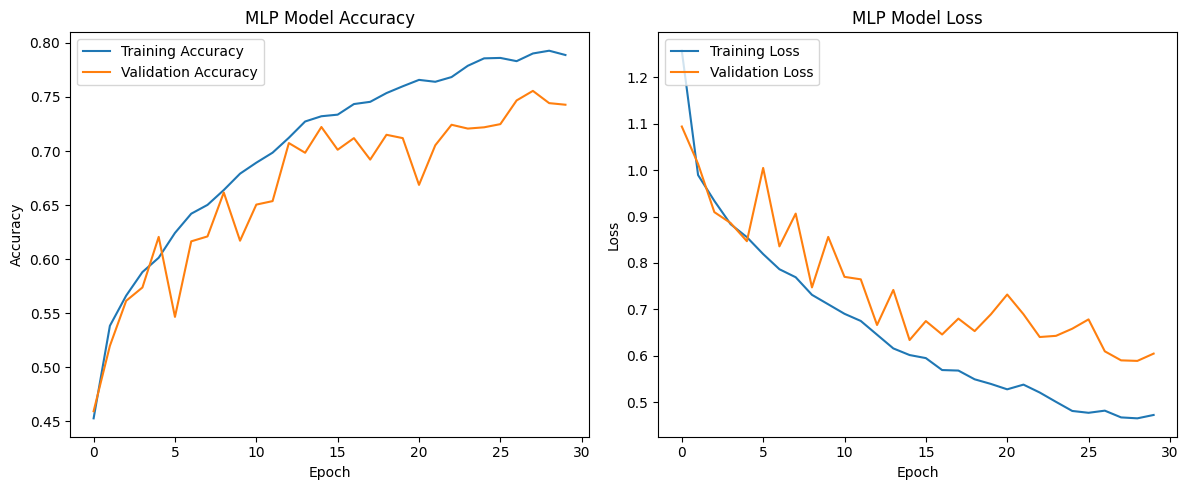

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy') 
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('MLP Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('MLP Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


213/213 [==============================] - 0s 1ms/step


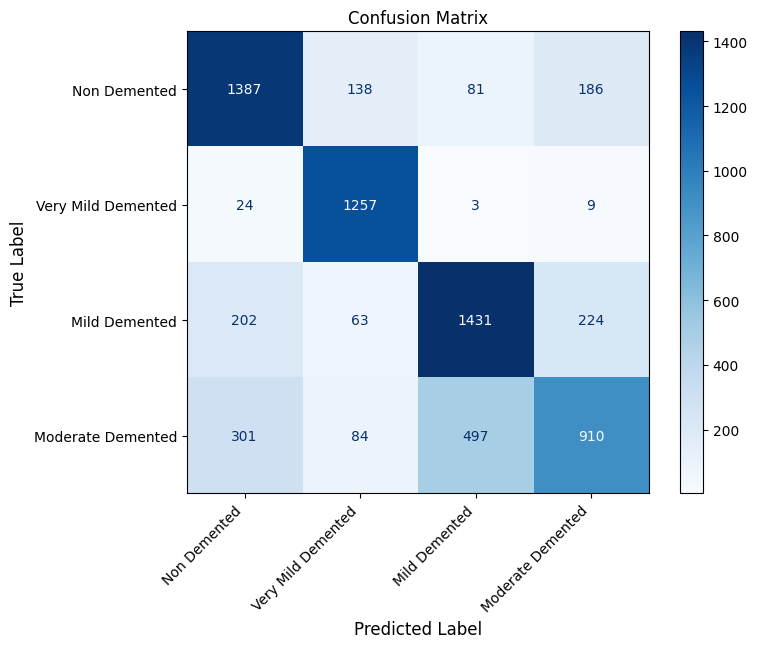

Classification Report:
                     precision    recall  f1-score   support

      Non Demented       0.72      0.77      0.75      1792
Very Mild Demented       0.82      0.97      0.89      1293
     Mild Demented       0.71      0.75      0.73      1920
 Moderate Demented       0.68      0.51      0.58      1792

          accuracy                           0.73      6797
         macro avg       0.73      0.75      0.74      6797
      weighted avg       0.73      0.73      0.73      6797



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Define your actual class names here
class_names = ['Non Demented', 'Very Mild Demented', 'Mild Demented', 'Moderate Demented']

# Get predictions
y_pred = model.predict(test_images_flat)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Compute and display confusion matrix with updated labels
cm = confusion_matrix(test_labels, y_pred_classes)
plt.figure(figsize=(8, 6))  # Increase the figure size for clarity
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.title("Confusion Matrix")
plt.show()

# Print classification report with class names
report = classification_report(test_labels, y_pred_classes, target_names=class_names)
print("Classification Report:\n", report)
